In [115]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
z = open('/content/gdrive/MyDrive/hw2/data/ridgetrain.txt')

In [118]:
train=z.read().split()

In [119]:
x_train = np.zeros(len(train)//2)
y_train = np.zeros(len(train)//2)

In [120]:
for i in range(0,len(train),2):
  x_train[i//2] = train[i]
  y_train[i//2] = train[i+1]

In [121]:
z.close()

In [122]:
z = open('/content/gdrive/MyDrive/hw2/data/ridgetest.txt')

In [123]:
test=z.read().split()

In [124]:
x_test = np.zeros(len(test)//2)
y_test = np.zeros(len(test)//2)

In [125]:
for i in range(0,len(test),2):
  x_test[i//2] = test[i]
  y_test[i//2] = test[i+1]

In [126]:
z.close()

In [127]:
x_train = x_train.reshape(x_train.shape[0],1)
x_test = x_test.reshape(x_test.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_train = y_train.reshape(y_train.shape[0],1)

In [128]:
Lambda = [0.1, 1, 10, 100] #storing lambda values for iterating later for kernel

In [129]:
L = [2, 5, 20, 50, 100] #storing L values for iterating later for landmark

In [130]:
Gamma = 0.1

In [131]:
k_train = np.zeros((len(x_train),len(x_train)))
k_test = np.zeros((len(x_test),len(x_test)))

In [132]:
for i in range(len(x_train)):
  for j in range(i,len(x_train)):
    k_train[i][j] = k_train[j][i] = np.exp(-Gamma*(x_train[i] - x_train[j])**2) #Kernel building

In [133]:
k_train

array([[1.00000000e+00, 8.87006235e-05, 1.55452635e-02, ...,
        1.32915712e-02, 1.72663505e-03, 2.88225811e-01],
       [8.87006235e-05, 1.00000000e+00, 5.31558783e-12, ...,
        3.60286529e-12, 3.11402076e-14, 2.80846549e-08],
       [1.55452635e-02, 5.31558783e-12, 1.00000000e+00, ...,
        9.98555267e-01, 7.92972337e-01, 4.24832283e-01],
       ...,
       [1.32915712e-02, 3.60286529e-12, 9.98555267e-01, ...,
        1.00000000e+00, 8.21366095e-01, 3.95395888e-01],
       [1.72663505e-03, 3.11402076e-14, 7.92972337e-01, ...,
        8.21366095e-01, 1.00000000e+00, 1.38170180e-01],
       [2.88225811e-01, 2.80846549e-08, 4.24832283e-01, ...,
        3.95395888e-01, 1.38170180e-01, 1.00000000e+00]])

In [134]:
k_train.shape

(250, 250)

In [135]:
I = np.identity(k_train.shape[0])

In [136]:
I.shape

(250, 250)

In [137]:
Alpha = np.dot(np.linalg.inv(k_train + Lambda[0]*I),y_train)
z=np.dot(np.transpose(Alpha), k_test)

In [138]:
z.shape

(1, 250)

In [139]:
k_train.shape

(250, 250)

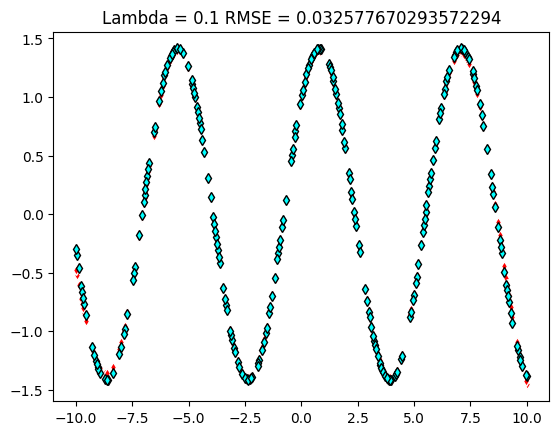

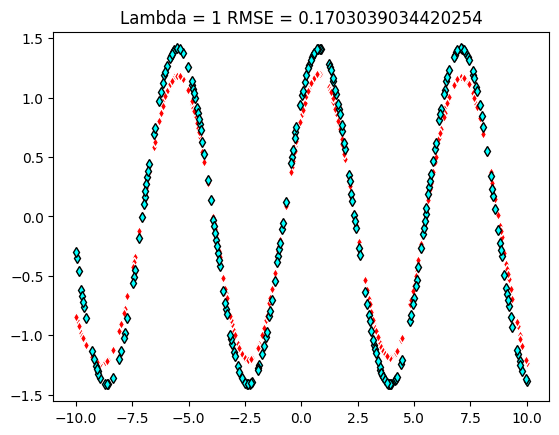

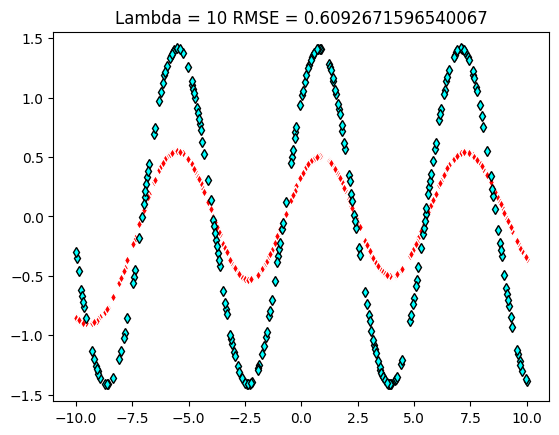

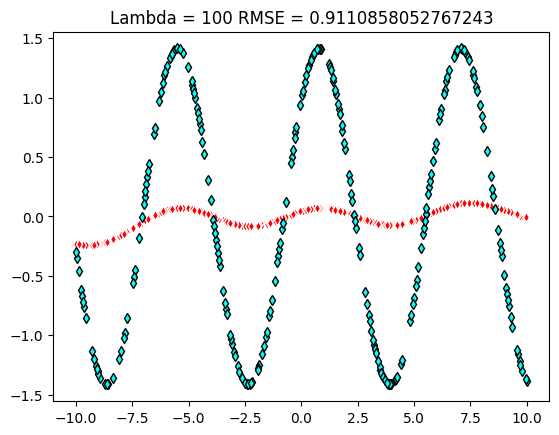

In [141]:
for k in range(len(Lambda)):
  Alpha = np.dot(np.linalg.inv(k_train + Lambda[k]*I),y_train)
  for i in range(len(x_train)):
    for j in range(len(x_test)):
      k_test[i][j] = np.exp(-Gamma*(x_train[i] - x_test[j])**2) #Kernel building
  y_pred = np.dot(np.transpose(Alpha), k_test)
  RMSE = np.sqrt(np.mean(np.square(y_test-np.transpose(y_pred))))

  plt.figure(Lambda[k])
  plt.title('Lambda = ' + str(Lambda[k]) + ' RMSE = ' + str(RMSE))
  plt.plot(x_test, np.transpose(y_pred), color='white', markerfacecolor='red', linewidth = 0, marker='d', markersize=5)
  plt.plot(x_test, y_test, color='black', markerfacecolor='cyan', linewidth = 0, marker='d', markersize=5)

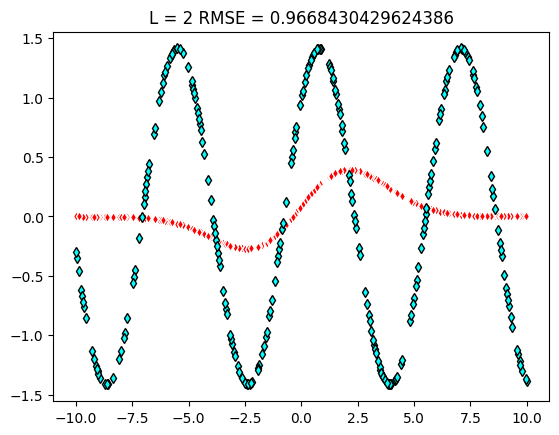

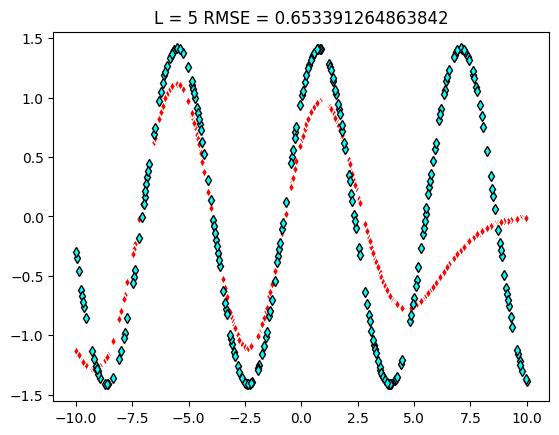

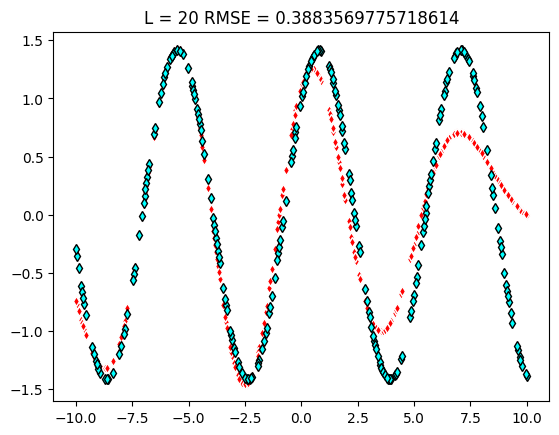

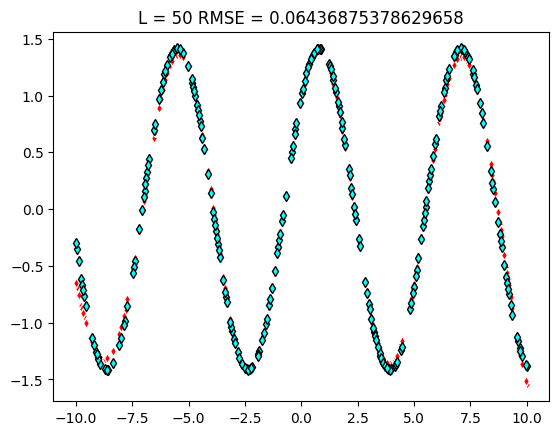

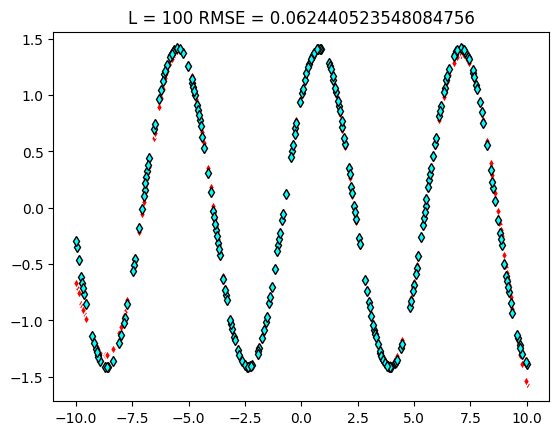

In [142]:
for k in range(len(L)):
    n_choice = np.random.choice(x_train.reshape(len(x_train)), L[k], replace=False)
    I = np.eye(L[k])
    l_train = np.zeros((len(x_train),len(n_choice)))
    l_test = np.zeros((len(x_test),len(n_choice)))
    for i in range(len(x_train)):
      for j in range(len(n_choice)):
        l_train[i][j] = np.exp(-Gamma*(x_train[i] - n_choice[j])**2) #Landmark building
        l_test[i][j] = np.exp(-Gamma*(x_test[i] - n_choice[j])**2) #Landmark building

    a = np.linalg.inv(np.dot(np.transpose(l_train), l_train) + Lambda[0]*I)
    b = np.dot(np.transpose(l_train), y_train)
    W = np.dot(a,b)

    y_pred = np.dot(l_test, W)

    RMSE = np.sqrt(np.mean(np.square(y_test-y_pred)))

    plt.figure(L[k])
    plt.title('L = ' + str(L[k]) + ' RMSE = ' + str(RMSE))
    plt.plot(x_test, y_pred, color='white', markerfacecolor='red', linewidth = 0, marker='d', markersize=5)
    plt.plot(x_test, y_test, color='black', markerfacecolor='cyan', linewidth = 0, marker='d', markersize=5)